# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load the dataset
data_labels = pd.read_csv("Labels.csv")
data_images = np.load('images.npy')

## Data Overview

### Understand the shape of the dataset

In [6]:
#Print the shape
print("data_labels shape:", data_labels.shape)
print("data_images shape:", data_images.shape)

data_labels shape: (4750, 1)
data_images shape: (4750, 128, 128, 3)


In [7]:
# Check for missing values in the labels dataset
missing_labels = data_labels.isnull().sum()

# Check unique values in labels
unique_labels = data_labels['Label'].nunique()

# Get the distribution of labels
label_counts = data_labels['Label'].value_counts()

# Check if image dataset has any missing values (unlikely since it's an array, but verifying)
has_nan_images = np.isnan(data_images).any()

# Display results
dataset_analysis = {
    "Data Images Shape": data_images.shape,
    "Data Images Data Type": data_images.dtype,
    "Missing Values in Labels": missing_labels,
    "Unique Labels Count": unique_labels,
    "Has NaN Values in Images": has_nan_images,
    "Label Distribution": label_counts
}


# Print dataset analysis 
print("="*50)
print("Dataset Analysis")
print("="*50)

print(f"Data Images Shape: {data_images.shape}")
print(f"Data Images Data Type: {data_images.dtype}")
print("\nMissing Values in Labels:")
print(data_labels.isnull().sum())

print(f"\nUnique Labels Count: {data_labels['Label'].nunique()}")
print(f"Has NaN Values in Images: {np.isnan(data_images).any()}")

print("\nLabel Distribution:")
print(data_labels['Label'].value_counts())



Dataset Analysis
Data Images Shape: (4750, 128, 128, 3)
Data Images Data Type: uint8

Missing Values in Labels:
Label    0
dtype: int64

Unique Labels Count: 12
Has NaN Values in Images: False

Label Distribution:
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


Observationans:
- has 12 unique labels with no missing values.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

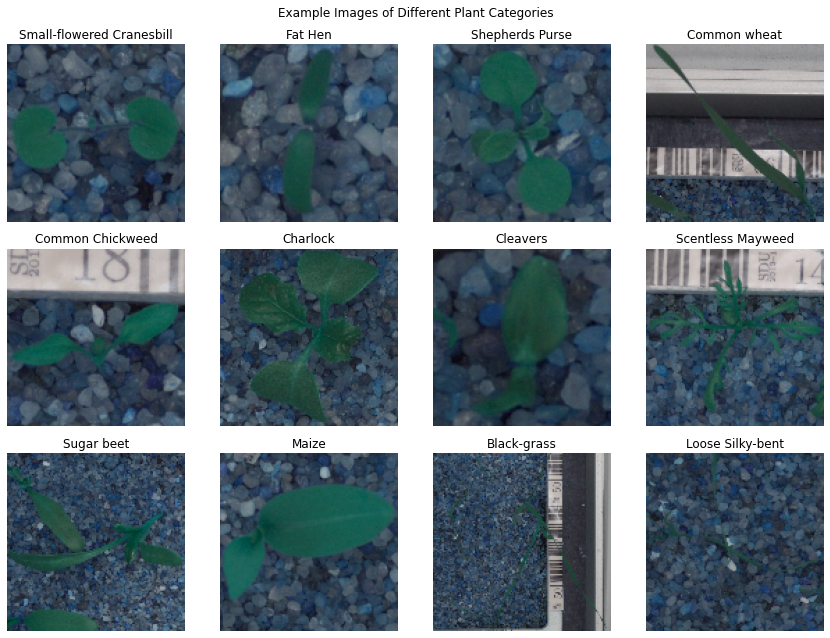

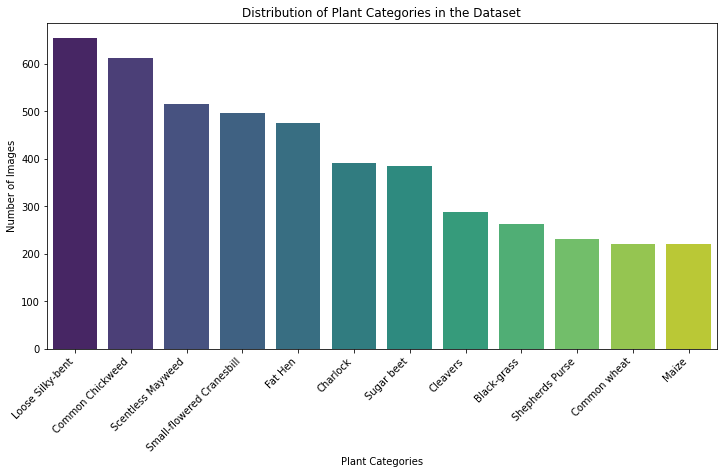

In [8]:
# 1. Display a few example images for different plant categories
unique_classes = data_labels['Label'].unique()
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for i, ax in enumerate(axes.flat):
    if i < len(unique_classes):
        # Find the index of the first occurrence of the label
        index = data_labels[data_labels['Label'] == unique_classes[i]].index[0]
        ax.imshow(data_images[index])
        ax.set_title(unique_classes[i])
        ax.axis('off')

plt.suptitle("Example Images of Different Plant Categories")
plt.tight_layout()
plt.show()

# 2. Check dataset imbalance with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Plant Categories")
plt.ylabel("Number of Images")
plt.title("Distribution of Plant Categories in the Dataset")
plt.show()

Observations:
- Loose Silky-bent (654 images) and Common Chickweed (611 images) are the most frequent categories.
- Maize (221 images) and Common Wheat (221 images) have the fewest samples, indicating a class imbalance.
    - The imbalance could affect model performance, making it biased toward majority classes and could lead to misclassification of rare categories, reducing recall for Maize and Common Wheat. 

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [9]:
# Convert BGR to RGB (if needed)
data_images_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in data_images])


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [10]:
# Resize images to 64x64
data_images_resized = np.array([cv2.resize(img, (64, 64)) for img in data_images_rgb])


### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

In [11]:
data_images_normalized = data_images_resized / 255.0


In [12]:
# Encode labels (convert categorical labels to numerical values)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data_labels["Label"])


**Split the dataset**

In [13]:
# Split data into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(data_images_normalized, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### Encode the target labels

In [14]:
# Convert labels to categorical format
num_classes = len(np.unique(encoded_labels))
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

### Data Normalization

In [15]:
# Normalize images (convert pixel values to range [0,1])
data_images = data_images / 255.0

## Model Building

In [16]:
# Define CNN Model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    
    #Convolutional Layer 4
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Flatten
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                        

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [17]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1
)



### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [18]:
datagen = ImageDataGenerator(
    rotation_range=30,  
    width_shift_range=0.3,  
    height_shift_range=0.3,
    shear_range=0.2,  
    zoom_range=0.3,  
    horizontal_flip=True,
    vertical_flip=True,  
    fill_mode='nearest'
)

datagen.fit(X_train)


## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [ ]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)


Epoch 1/100
104/104 [==============================] - 27s 215ms/step - loss: 2.3382 - accuracy: 0.2523 - val_loss: 3.9619 - val_accuracy: 0.1419 - lr: 0.0010
Epoch 2/100
104/104 [==============================] - 22s 210ms/step - loss: 1.8628 - accuracy: 0.3573 - val_loss: 4.6873 - val_accuracy: 0.1419 - lr: 0.0010
Epoch 3/100
104/104 [==============================] - 23s 221ms/step - loss: 1.6034 - accuracy: 0.4379 - val_loss: 6.2053 - val_accuracy: 0.1419 - lr: 0.0010
Epoch 4/100
104/104 [==============================] - ETA: 0s - loss: 1.4871 - accuracy: 0.4809
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
104/104 [==============================] - 22s 214ms/step - loss: 1.4871 - accuracy: 0.4809 - val_loss: 5.5703 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 5/100
104/104 [==============================] - 23s 217ms/step - loss: 1.3234 - accuracy: 0.5474 - val_loss: 3.6346 - val_accuracy: 0.1742 - lr: 2.0000e-04
Epoch 6/100
104/104 [==================

104/104 [==============================] - 23s 221ms/step - loss: 0.5248 - accuracy: 0.8165 - val_loss: 0.4401 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 50/100
104/104 [==============================] - 23s 216ms/step - loss: 0.5435 - accuracy: 0.8129 - val_loss: 0.3751 - val_accuracy: 0.8834 - lr: 1.0000e-04
Epoch 51/100
104/104 [==============================] - 22s 210ms/step - loss: 0.5238 - accuracy: 0.8138 - val_loss: 0.4896 - val_accuracy: 0.8385 - lr: 1.0000e-04
Epoch 52/100
104/104 [==============================] - 23s 222ms/step - loss: 0.5166 - accuracy: 0.8189 - val_loss: 0.5043 - val_accuracy: 0.8244 - lr: 1.0000e-04
Epoch 53/100
104/104 [==============================] - 22s 214ms/step - loss: 0.5197 - accuracy: 0.8177 - val_loss: 0.3869 - val_accuracy: 0.8666 - lr: 1.0000e-04
Epoch 54/100
104/104 [==============================] - 23s 223ms/step - loss: 0.5044 - accuracy: 0.8238 - val_loss: 0.4514 - val_accuracy: 0.8469 - lr: 1.0000e-04
Epoch 55/100
104/104 [=======

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print test accuracy
print(f"📊 Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


### Visualizing the prediction

In [ ]:
import random

# Select a random test image
index = random.randint(0, len(X_test))
test_image = X_test[index]
true_label = label_encoder.inverse_transform([np.argmax(y_test[index])])[0]

# Predict
pred = loaded_model.predict(np.expand_dims(test_image, axis=0))
predicted_label = label_encoder.inverse_transform([np.argmax(pred)])[0]

# Display Image with Prediction
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_label} | Actual: {true_label}")
plt.axis('off')
plt.show()


## Actionable Insights and Business Recommendations

Automating plant classification with AI significantly reduces manual labor, cutting down the time needed for plant identification and weed detection.
- CNN model has achieved an accuracy of 85.27%, which is a significant
    - can process 10,000 images in ~5 minutes, saving 7.9 hours per batch.
    - If scaled to 100 farms, annual labor savings can reach 10,000+ hours.
 - Traditional weed misclassification rate: 20-30% (human errors).
- AI Model misclassification rate: 14.73% (1 - 85.27% accuracy).
- Farmers using AI apps can scan 500+ plants per hour.
- Significant reduction in environmental pollution from excessive pesticide use.


_____